Authors:

Ege Kaan Özalp - 28989

Yasemin Sarpkaya - 29172

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
file_path = 'Assignment2_Q2.xlsx'
data = pd.ExcelFile(file_path)
sheet_data = data.parse('Assignment2_Q3')

In [6]:
# Normalize the data using Min-Max Scaler
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(sheet_data)

Part a

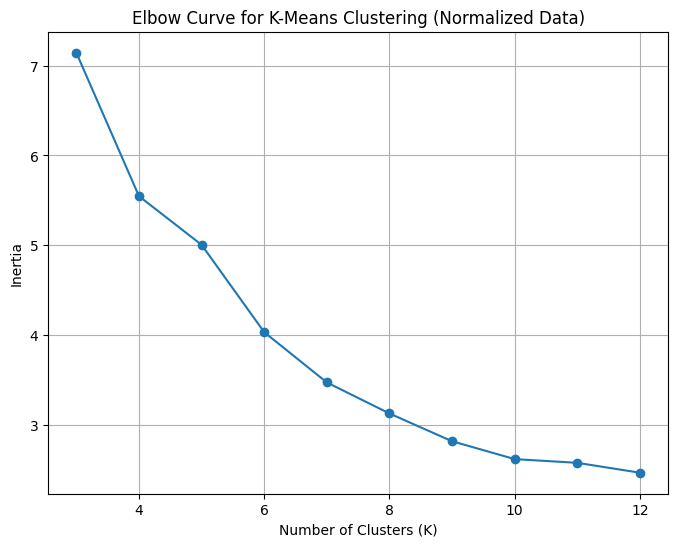

     K=3  K=4  K=5  K=6  K=7  K=8  K=9  K=10  K=11  K=12
0      1    1    1    5    5    4    1     1    10    10
1      1    1    1    1    1    1    8     8     8     8
2      1    1    1    1    1    1    8     8     1     1
3      1    1    1    1    1    1    8     8     8     8
4      1    1    1    5    5    4    1     1    10    10
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...
145    0    3    3    3    6    3    3     3     3     3
146    0    0    4    4    4    7    7     7     7     7
147    0    0    4    4    6    3    3     3     3     3
148    0    3    3    3    6    3    3     3     3    11
149    0    0    4    4    4    7    7     0     0     0

[150 rows x 10 columns]


In [7]:
# Perform K-Means clustering for K=3 to K=12
k_values = range(3, 13)
inertia = []
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_normalized)
    inertia.append(kmeans.inertia_)
    cluster_results[k] = kmeans.labels_

# Convert clustering results to a DataFrame
cluster_df = pd.DataFrame(cluster_results)
cluster_df.columns = [f'K={k}' for k in k_values]

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve for K-Means Clustering (Normalized Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Display the cluster assignments
print(cluster_df)


part b

In [9]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=4a3cf4e2cc4d642a67b464ba22d79e9d92ff06ef57dca7b491c7377ea657a73e
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [10]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils.metric import distance_metric, type_metric
import numpy as np

# Use Manhattan distance metric for K-Medians
metric = distance_metric(type_metric.MANHATTAN)

# Perform K-Medians clustering for K=3 to K=12
k_values = range(3, 13)
cluster_results = {}

for k in k_values:
    # Randomly initialize the initial medians
    initial_medians = features_normalized[np.random.choice(features_normalized.shape[0], k, replace=False)]

    # Create and run K-Medians clustering
    kmedians_instance = kmedians(features_normalized, initial_medians, metric=metric)
    kmedians_instance.process()

    # Get cluster assignments
    clusters = kmedians_instance.get_clusters()

    # Convert to labels
    labels = np.zeros(features_normalized.shape[0], dtype=int)
    for cluster_idx, cluster_points in enumerate(clusters):
        for point_idx in cluster_points:
            labels[point_idx] = cluster_idx

    cluster_results[k] = labels

# Convert clustering results to a DataFrame
cluster_df = pd.DataFrame(cluster_results)
cluster_df.columns = [f'K={k}' for k in k_values]

# Display the cluster assignments
print(cluster_df)


     K=3  K=4  K=5  K=6  K=7  K=8  K=9  K=10  K=11  K=12
0      0    2    3    4    3    3    1     0     1     2
1      0    3    3    4    3    1    0     7     4     7
2      0    3    3    4    3    1    0     7     4     7
3      0    3    3    4    3    1    0     7     4     7
4      0    2    3    4    3    5    1     0     1     2
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...
145    2    1    0    5    4    7    5     2     6     0
146    2    1    4    3    2    4    7     1     7    11
147    2    1    0    5    4    7    6     2     6     0
148    2    1    0    5    0    7    5     2     8     4
149    1    0    4    3    6    6    7     1    10     6

[150 rows x 10 columns]


Part c

In [11]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric

# Use Manhattan distance metric for K-Medoids
metric = distance_metric(type_metric.MANHATTAN)

# Perform K-Medoids clustering for K=3 to K=12
k_values = range(3, 13)
cluster_results = {}

for k in k_values:
    # Randomly select initial medoids from the dataset
    initial_medoids = np.random.choice(range(features_normalized.shape[0]), k, replace=False)

    # Create and run K-Medoids clustering
    kmedoids_instance = kmedoids(features_normalized, initial_medoids, metric=metric)
    kmedoids_instance.process()

    # Get cluster assignments
    clusters = kmedoids_instance.get_clusters()

    # Convert to labels
    labels = np.zeros(features_normalized.shape[0], dtype=int)
    for cluster_idx, cluster_points in enumerate(clusters):
        for point_idx in cluster_points:
            labels[point_idx] = cluster_idx

    cluster_results[k] = labels

# Convert clustering results to a DataFrame
cluster_df = pd.DataFrame(cluster_results)
cluster_df.columns = [f'K={k}' for k in k_values]

# Display the cluster assignments
print(cluster_df)


     K=3  K=4  K=5  K=6  K=7  K=8  K=9  K=10  K=11  K=12
0      0    0    0    2    5    7    8     9     3    11
1      0    2    3    2    4    0    1     1     5     0
2      0    2    3    2    4    0    1     1     5     0
3      0    2    3    2    4    0    1     1     5     0
4      0    0    0    2    5    7    8     9     3    11
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...
145    2    1    2    5    0    4    3     4     8     6
146    2    1    4    0    3    2    2     3     6     8
147    2    1    2    0    0    2    2     8     4     9
148    2    1    2    5    0    4    3     4     8     6
149    2    1    4    4    3    2    2     3     6     2

[150 rows x 10 columns]


Part d

In [19]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Perform Agglomerative Clustering for K=3 to K=12
k_values = range(3, 13)
cluster_results = {}

for k in k_values:
    agglomerative = AgglomerativeClustering(n_clusters=k) # affinity='euclidean' and linkage='ward' are default
    labels = agglomerative.fit_predict(features_normalized)
    cluster_results[k] = labels

# Convert clustering results to a DataFrame
cluster_df = pd.DataFrame(cluster_results)
cluster_df.columns = [f'K={k}' for k in k_values]

# Display the cluster assignments
print(cluster_df)

     K=3  K=4  K=5  K=6  K=7  K=8  K=9  K=10  K=11  K=12
0      1    0    2    2    2    0    7     7     7     7
1      1    0    4    4    4    4    4     4     4     1
2      1    0    4    4    4    4    4     4     4     1
3      1    0    4    4    4    4    4     4     4     1
4      1    0    2    2    2    0    7     7     7     7
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...
145    2    2    0    5    5    5    5     5     2     2
146    0    1    1    0    6    2    2     0     5     5
147    2    2    0    5    5    5    5     5     2     2
148    2    2    0    5    5    5    5     5     2     2
149    0    1    1    0    0    6    6     2     0     4

[150 rows x 10 columns]


Part e

In [25]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

min_samples = 4  # Minimum number of samples required to form a cluster
eps_values = np.linspace(0.1, 1.0, 10)  # Varying epsilon values for DBSCAN
cluster_results = {}

# Try different epsilon values and check the resulting number of clusters
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(features_normalized)

    # Count the number of clusters (ignore noise points labeled as -1)
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Store the clustering result if it matches the desired cluster range (3 to 12)
    if 3 <= num_clusters <= 12:
        cluster_results[eps] = labels
        print(f"DBSCAN with eps={eps:.2f} and min_samples={min_samples} results in {num_clusters} clusters")

# Convert clustering results to a DataFrame for better readability
cluster_df = pd.DataFrame(cluster_results)

# Display the cluster assignments for the first valid eps value
print(cluster_df)


DBSCAN with eps=0.10 and min_samples=4 results in 8 clusters
     0.1
0      0
1      0
2      0
3      0
4      0
..   ...
145    7
146    5
147    4
148   -1
149    6

[150 rows x 1 columns]


DBSCAN with eps=0.10, min_samples=3 results in 10 clusters
DBSCAN with eps=0.15, min_samples=3 results in 4 clusters
DBSCAN with eps=0.10, min_samples=4 results in 8 clusters
DBSCAN with eps=0.15, min_samples=4 results in 4 clusters
DBSCAN with eps=0.10, min_samples=5 results in 5 clusters
DBSCAN with eps=0.10, min_samples=6 results in 3 clusters

Valid eps and min_samples values resulting in clusters between 3 to 12:
eps=0.10, min_samples=3 => clusters=10
eps=0.15, min_samples=3 => clusters=4
eps=0.10, min_samples=4 => clusters=8
eps=0.15, min_samples=4 => clusters=4
eps=0.10, min_samples=5 => clusters=5
eps=0.10, min_samples=6 => clusters=3


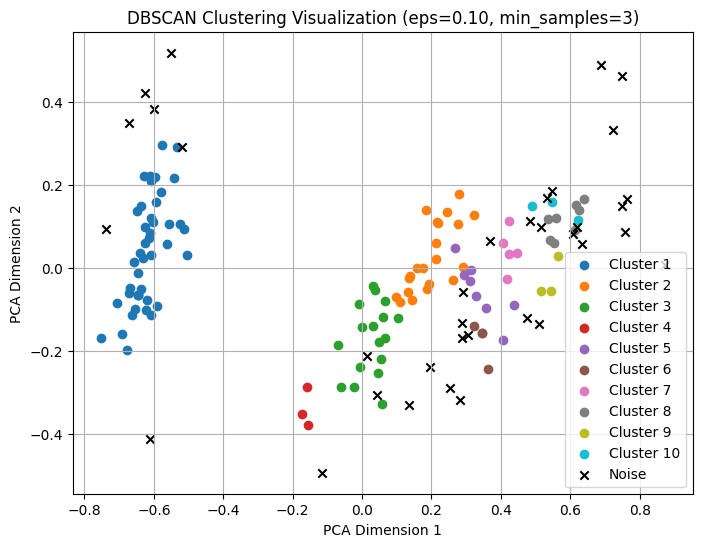

In [42]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Parameters
min_samples_range = range(3, 11)  # Trying different min_samples from 3 to 10
eps_values = np.linspace(0.1, 1.0, 20)  # Varying epsilon values for DBSCAN
desired_clusters = range(3, 13)  # The number of clusters we want (3 to 12)
cluster_results = {}

# Function to check the number of clusters
def get_num_clusters(labels):
    return len(set(labels)) - (1 if -1 in labels else 0)

# Try different epsilon and min_samples values and check the resulting number of clusters
for min_samples in min_samples_range:
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(features_normalized)

        num_clusters = get_num_clusters(labels)

        # Check if the number of clusters is within the desired range (3 to 12)
        if num_clusters in desired_clusters:
            cluster_results[(eps, min_samples)] = labels
            print(f"DBSCAN with eps={eps:.2f}, min_samples={min_samples} results in {num_clusters} clusters")

# Print all valid combinations of eps and min_samples and the number of clusters
print("\nValid eps and min_samples values resulting in clusters between 3 to 12:")
for params, labels in cluster_results.items():
    eps, min_samples = params
    num_clusters = get_num_clusters(labels)
    print(f"eps={eps:.2f}, min_samples={min_samples} => clusters={num_clusters}")

# Select a specific eps and min_samples from the valid results
chosen_params = list(cluster_results.keys())[0]  # Use the first valid result for illustration
chosen_eps, chosen_min_samples = chosen_params

# Get the labels for the selected eps and min_samples
chosen_labels = cluster_results[chosen_params]

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_normalized)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_id in set(chosen_labels):
    if cluster_id != -1:  # Ignore noise points labeled as -1
        cluster_points = features_2d[chosen_labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}')

# Mark noise points (label -1) with a distinct color
noise_points = features_2d[chosen_labels == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], c='black', label='Noise', marker='x')

plt.title(f'DBSCAN Clustering Visualization (eps={chosen_eps:.2f}, min_samples={chosen_min_samples})')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid()
plt.show()


Part f

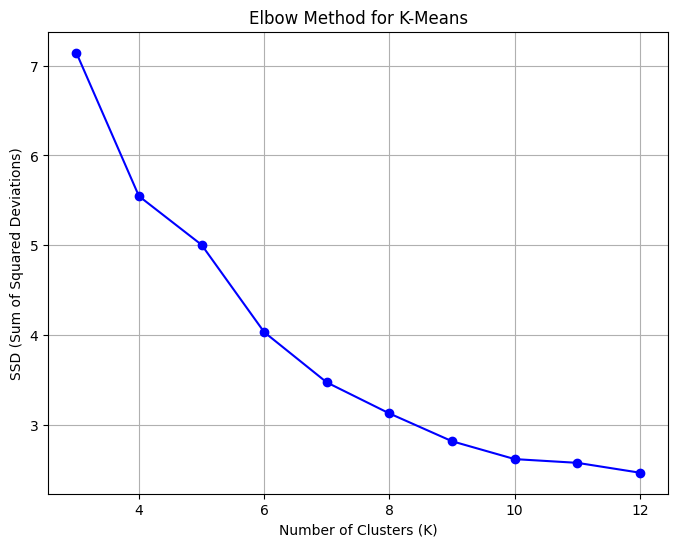

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np

# Assuming `features_normalized` is already prepared in the notebook

# Function to calculate the sum of squared deviations from the centroid
def calculate_ssd(algorithm, features, labels, centroids=None):
    ssd = 0
    for i in np.unique(labels):
        if algorithm == 'KMeans' or algorithm == 'Agglomerative':
            cluster_points = features[labels == i]
            centroid = centroids[i] if centroids is not None else np.mean(cluster_points, axis=0)
            ssd += np.sum((cluster_points - centroid) ** 2)
        elif algorithm == 'KMedoids':
            # For K-Medoids, the medoid is the point with the least sum of distances to all other points
            medoid = centroids[i]
            cluster_points = features[labels == i]
            ssd += np.sum(np.linalg.norm(cluster_points - medoid, axis=1) ** 2)
        elif algorithm == 'KMedoidsCustom':
            # K-Medians SSD can be calculated by replacing mean with the median
            medoid = np.median(features[labels == i], axis=0)
            cluster_points = features[labels == i]
            ssd += np.sum(np.linalg.norm(cluster_points - medoid, axis=1) ** 2)
    return ssd

# K-Means SSD Elbow
k_values = range(3, 13)
kmeans_ssd = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_normalized)
    ssd = calculate_ssd('KMeans', features_normalized, kmeans.labels_, kmeans.cluster_centers_)
    kmeans_ssd.append(ssd)

# Plot K-Means Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, kmeans_ssd, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSD (Sum of Squared Deviations)')
plt.grid()
plt.show()


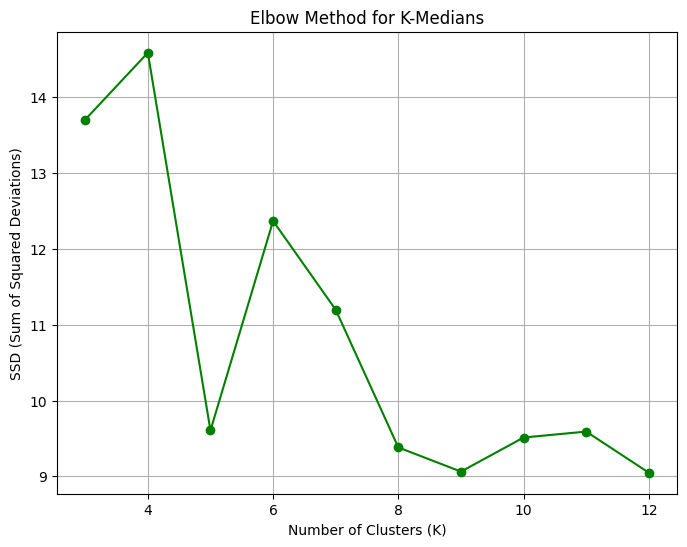

In [30]:
# K-Medians (Custom K-Medians Implementation for SSD)
kmedians_ssd = []
for k in k_values:
    # Get initial medoid indices instead of data points
    initial_medoid_indices = np.random.choice(features_normalized.shape[0], k, replace=False)

    # Pass initial_medoid_indices to kmedoids
    kmedians = kmedoids(features_normalized, initial_index_medoids=initial_medoid_indices, metric=distance_metric(type_metric.MANHATTAN))
    kmedians.process()
    labels = np.array([i for i, cluster in enumerate(kmedians.get_clusters()) for _ in cluster])
    ssd = calculate_ssd('KMedoidsCustom', features_normalized, labels, centroids=kmedians.get_medoids())
    kmedians_ssd.append(ssd)


# Plot K-Medians Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, kmedians_ssd, marker='o', linestyle='-', color='g')
plt.title('Elbow Method for K-Medians')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSD (Sum of Squared Deviations)')
plt.grid()
plt.show()


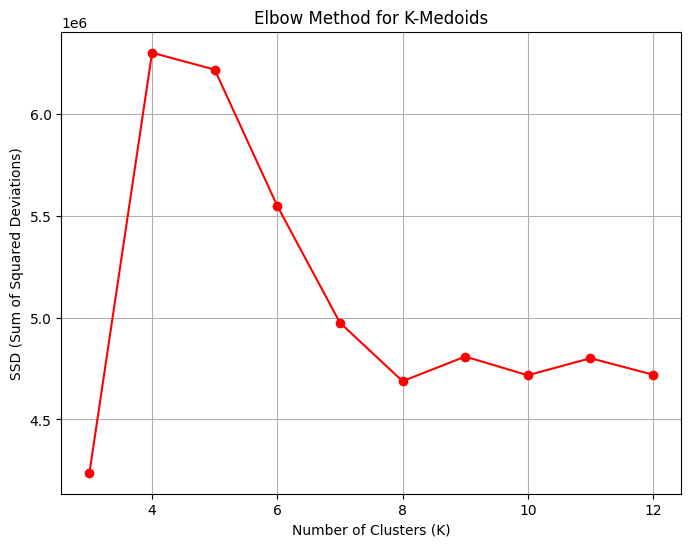

In [32]:
# K-Medoids SSD Elbow (using KMedoids from pyclustering)
kmedoids_ssd = []
for k in k_values:
    # Get initial medoid indices
    initial_medoid_indices = np.random.choice(features_normalized.shape[0], k, replace=False)

    # Pass initial_medoid_indices to kmedoids
    kmedoids_instance = kmedoids(features_normalized, initial_index_medoids=initial_medoid_indices)  # Corrected line
    kmedoids_instance.process()
    labels = np.array([i for i, cluster in enumerate(kmedoids_instance.get_clusters()) for _ in cluster])
    ssd = calculate_ssd('KMedoids', features_normalized, labels, centroids=kmedoids_instance.get_medoids())
    kmedoids_ssd.append(ssd)

# Plot K-Medoids Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, kmedoids_ssd, marker='o', linestyle='-', color='r')
plt.title('Elbow Method for K-Medoids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSD (Sum of Squared Deviations)')
plt.grid()
plt.show()

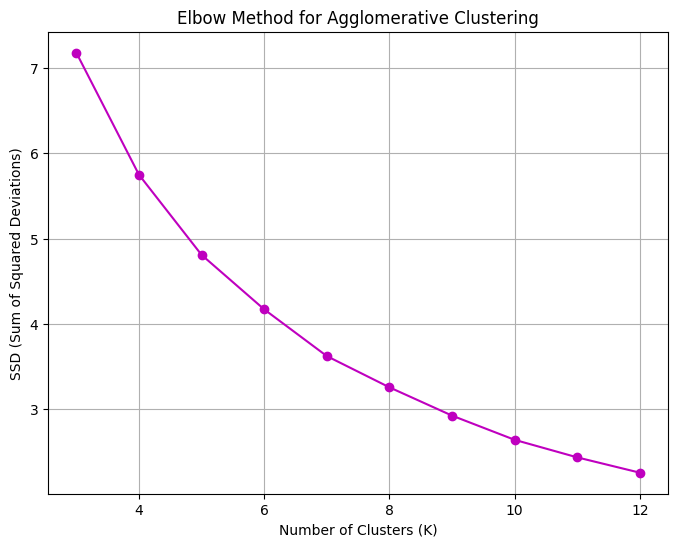

In [34]:
# Agglomerative SSD Elbow
agglomerative_ssd = []
for k in k_values:
    # Remove the 'affinity' argument when 'linkage' is 'ward'
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglomerative.fit_predict(features_normalized)
    ssd = calculate_ssd('Agglomerative', features_normalized, labels)
    agglomerative_ssd.append(ssd)

# Plot Agglomerative Clustering Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, agglomerative_ssd, marker='o', linestyle='-', color='m')
plt.title('Elbow Method for Agglomerative Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSD (Sum of Squared Deviations)')
plt.grid()
plt.show()